
# Assignment 1: Creating an alternative to COMPAS

This notebook contains a set of exercises that will guide you through the different steps of this assignment. Solutions need to be code-based, _i.e._ hard-coded or manually computed results will not be accepted. Remember to write your solutions to each exercise in the dedicated cells and to not modify the test cells. When you are done completing all the exercises submit this same notebook back to moodle in **.ipynb** format.

<div class="alert alert-success">

In recent years, judges, probation and parole officers have been increasingly using algorithms to assess a criminal defendant’s likelihood of becoming a recidivist – a term used to describe criminals who re-offend. There are dozens of these risk assessment algorithms in use. Many states have built their own assessment tools, and there are also two leading nationwide tools offered by commercial vendors.

A few years back, an organization called ProPublica set out to assess one of these commercial tools to discover the underlying accuracy of their recidivism algorithm and to test whether the algorithm was biased against certain groups. In particular, they studied a tool called COMPAS (which stands for Correctional Offender Management Profiling for Alternative Sanctions), made by Northpointe, Inc. You can check their conclusions by reading their story ["Machine Bias"](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing).

Through a public records request, ProPublica obtained two years worth of COMPAS scores from the Broward County Sheriff’s Office in Florida. The complete dataset contained information for all 18,610 people who were scored by this software in 2013 and 2014.
    
</div>

<div class="alert alert-danger"><b>Submission deadline:</b> Sunday, February 6th, 23:55</div>


In [1]:
import pandas as pd

<div class="alert alert-info"><b>Exercise 1</b>

Load the ProPublica data from the link: https://github.com/jnin/information-systems/raw/main/data/compas_ai2.csv in a DataFrame called ```df```.
<br><i>[0.5 points]</i>
</div>
<div class="alert alert-warning">
Do not download the dataset. Instead, read the data directly from the provided link
</div>

In [2]:
# YOUR CODE HERE
df = pd.read_csv('https://github.com/jnin/information-systems/raw/main/data/compas_ai2.csv')
df

,Agency,Gender,Ethnic,YearOfBirth,ScaleSet,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,DisplayText,DecileScore
0,PRETRIAL,Male,Caucasian,1992,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Risk of Violence,4
1,PRETRIAL,Male,Caucasian,1992,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Risk of Recidivism,2
2,PRETRIAL,Male,Caucasian,1992,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Risk of Failure to Appear,1
3,PRETRIAL,Male,Caucasian,1984,Risk and Prescreen,Pretrial,Jail Inmate,Married,1,Risk of Violence,2
4,PRETRIAL,Male,Caucasian,1984,Risk and Prescreen,Pretrial,Jail Inmate,Married,1,Risk of Recidivism,1
...,...,...,...,...,...,...,...,...,...,...,...
60793,Probation,Male,African-American,1964,Risk and Prescreen,Pretrial,Jail Inmate,Single,3,Risk of Recidivism,8
60794,Probation,Male,African-American,1964,Risk and Prescreen,Pretrial,Jail Inmate,Single,3,Risk of Failure to Appear,10
60795,PRETRIAL,Male,Caucasian,1985,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Risk of Violence,2
60796,PRETRIAL,Male,Caucasian,1985,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Risk of Recidivism,5


In [3]:
#data exploration
df.head()

,Agency,Gender,Ethnic,YearOfBirth,ScaleSet,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,DisplayText,DecileScore
0,PRETRIAL,Male,Caucasian,1992,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Risk of Violence,4
1,PRETRIAL,Male,Caucasian,1992,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Risk of Recidivism,2
2,PRETRIAL,Male,Caucasian,1992,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Risk of Failure to Appear,1
3,PRETRIAL,Male,Caucasian,1984,Risk and Prescreen,Pretrial,Jail Inmate,Married,1,Risk of Violence,2
4,PRETRIAL,Male,Caucasian,1984,Risk and Prescreen,Pretrial,Jail Inmate,Married,1,Risk of Recidivism,1


In [4]:
for column in df.columns:
    print(column)
    print(df[column].unique())
    print()

Agency
['PRETRIAL' 'Probation' 'DRRD' 'Broward County']

Gender
['Male' 'Female']

Ethnic
['Caucasian' 'African-American' 'Hispanic' 'Other' 'Asian'
 'Native American' 'Oriental' 'Arabic']

YearOfBirth
[1992 1984 1994 1985 1966 1993 1972 1986 1980 1978 1988 1979 1970 1991
 1975 1973 1981 1989 1960 1967 1955 1974 1987 1943 1977 1983 1968 1982
 1971 1959 1947 1962 1990 1965 1963 1964 1944 1954 1953 1956 1933 1961
 1969 1996 1976 1950 1958 1942 1957 1951 1929 1995 1946 1948 1945 1940
 1949 1952 1938 1937 1941 1935 1932 1918 1936 1997 1939 1925 1930 1919
 1998]

ScaleSet
['Risk and Prescreen' 'All Scales']

LegalStatus
['Pretrial' 'Post Sentence' 'Conditional Release' 'Other'
 'Probation Violator']

CustodyStatus
['Jail Inmate' 'Probation' 'Pretrial Defendant' 'Residential Program'
 'Other']

MaritalStatus
['Single' 'Married' 'Significant Other' 'Divorced' 'Separated' 'Widowed'
 'Unknown']

RecSupervisionLevel
[1 4 2 3]

DisplayText
['Risk of Violence' 'Risk of Recidivism' 'Risk of Failure

In [5]:
# LEAVE BLANK

For simplicity, we will predict the severity of a possible re-incidence, not the **DecileScore**. To this aim, we consider as a severe re-incidence value all scores above the median.

<div class="alert alert-info"><b>Exercise 2</b>

Create a new binary column named ```Severity``` with ```True``` if ```DecileScore``` is greater than (>) the **median** or ```False``` otherwise. Later, drop the column ```DecileScore```.
<br><i>[1 point]</i>
</div>

<div class="alert alert-warning">

Remember Python is case sentitive.
</div>


In [6]:
# YOUR CODE HERE
import numpy as np
decile_median = df['DecileScore'].median()
df['Severity'] = np.where(df['DecileScore'] > decile_median, True, False)

In [7]:
df.drop(columns = 'DecileScore', inplace = True)
df

,Agency,Gender,Ethnic,YearOfBirth,ScaleSet,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,DisplayText,Severity
0,PRETRIAL,Male,Caucasian,1992,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Risk of Violence,True
1,PRETRIAL,Male,Caucasian,1992,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Risk of Recidivism,False
2,PRETRIAL,Male,Caucasian,1992,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Risk of Failure to Appear,False
3,PRETRIAL,Male,Caucasian,1984,Risk and Prescreen,Pretrial,Jail Inmate,Married,1,Risk of Violence,False
4,PRETRIAL,Male,Caucasian,1984,Risk and Prescreen,Pretrial,Jail Inmate,Married,1,Risk of Recidivism,False
...,...,...,...,...,...,...,...,...,...,...,...
60793,Probation,Male,African-American,1964,Risk and Prescreen,Pretrial,Jail Inmate,Single,3,Risk of Recidivism,True
60794,Probation,Male,African-American,1964,Risk and Prescreen,Pretrial,Jail Inmate,Single,3,Risk of Failure to Appear,True
60795,PRETRIAL,Male,Caucasian,1985,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Risk of Violence,False
60796,PRETRIAL,Male,Caucasian,1985,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Risk of Recidivism,True


In [8]:
# LEAVE BLANK

In [9]:
# LEAVE BLANK

The next steps are preparing X and y and split them into train and test.

<div class="alert alert-info"><b>Exercise 3 </b> 
    
Write the code to create the feature matrix ```X``` and the target array ```y```, then split them into separate training and test sets with relative size of 0.9 and 0.1. Store the training and tests feature matrix in variables called ```X_train``` and ```X_test```, and the training and test label arrays as ```y_train``` and ```y_test```.
<br><i>[0.5 points]</i>
</div>

<div class='alert alert-warning'>
    
To ensure a reproducible output across multiple executions of this assignment add this parameter ```random_state=42``` when creating the train test split. It controls the randomness when splitting the data. This will guarantee that you always obtain the same performance metrics. </div>

In [10]:
# YOUR CODE HERE
#Define X and y
X = df.drop(columns = 'Severity')
y = df['Severity']

In [11]:
#split into training and test sets with relative size of 0.9 and 0.1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [12]:
# LEAVE BLANK

In [13]:
# LEAVE BLANK

In [14]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 4 </b> 

The resulting feature matrix contains categorical attributes. Write the code to create a ```ColumnTransformer``` to encode them using the one-hot encoding method. Store the transformer in a variable called ```transformer```. At this stage, you do not need to run it.
    
<br><i>[2 points]</i>
</div>

<div class='alert alert-warning'>

Not all the attributes are categorical. Ensure that non-categorical attributes remain intact.
</div>

In [15]:
# YOUR CODE HERE
categorical_features = []
numerical_features = []

for column in X:
    if X[column].dtypes == 'int64' or X[column].dtypes == 'float64':
        numerical_features.append(column)
    elif X[column].dtypes == 'object':
        categorical_features.append(column)
        
print(categorical_features, numerical_features)

['Agency', 'Gender', 'Ethnic', 'ScaleSet', 'LegalStatus', 'CustodyStatus', 'MaritalStatus', 'DisplayText'] ['YearOfBirth', 'RecSupervisionLevel']


In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehot_encoder = OneHotEncoder(sparse=False)

transformer = ColumnTransformer([('ohe', onehot_encoder, categorical_features)], remainder = 'passthrough')

In [17]:
# LEAVE BLANK

In [18]:
# LEAVE BLANK

In [19]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 5 </b> 

Write the code to create a ```Pipeline``` consisting of the previous transformer, a standard scaler and a logistic regression model. Store the resulting pipeline in a variable called **pipe**.
    
<br><i>[1 point]</i>
</div>

In [20]:
# YOUR CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline_steps = [('tranformer', transformer), ('standard_scaler', StandardScaler()), ('logistic_regression', LogisticRegression())]
pipe = Pipeline(pipeline_steps)

In [21]:
# LEAVE BLANK

In [22]:
# LEAVE BLANK

In [23]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 6 </b> 

Complete the function ```cross_validation_compas``` with the code to estimate the average performance of your model using cross-validation with **ten** stratified folds using the ```roc_auc``` score. ```cross_validation_compas``` takes three parameters: a SciKit-learn pipeline  ```compas_pipe```, a feature matrix ```X_train``` and a target array ```y_train``` and returns the obtained mean score as a float number
    
<i>[1.5 points]</i>
</div>

<div class='alert alert-warning'>

We ask you to create this function because we will run it to evaluate your answer without considering your previous solved exercises, avoiding that previous errors penalize you twice. Usually, the creation of a function for this task is not compulsory. Write the required imports **outside** the body of the function.
</div>

In [24]:
# YOUR CODE HERE
#Required imports
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

###Notes
#cross_validation_compas should return the mean performance of models using roc_auc

# YOUR CODE HERE
def cross_validation_compas(compas_pipe, X_train, y_train):

    #Score models with cross validation using roc_auc scoring (k=10)
    scores_roc_auc = cross_val_score(compas_pipe, X_train, y_train, cv = 10, scoring='roc_auc').mean() #Should this take a model as input or simply a pipe?
    
    return(scores_roc_auc)

In [25]:
cross_validation_compas(pipe, X_train, y_train)

0.8240326825522188

In [26]:
# LEAVE BLANK

In [27]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 7 </b> 

Now use the created model for prediction. Complete the function ```compute_cm``` with the code to train your model and compute the confusion matrix. The function ```compute_cm``` output must be an array containing the four values of the confusion matrix ```array([[TP, FN],[FP TN]])```.
    
<i>[1.5 point]</i>
</div>

<div class='alert alert-warning'>

As before, we ask you to create this function because we will run it to evaluate your answer without considering your previous solved exercises, avoiding that previous errors penalize you twice. Usually, the creation of a function for this task is not compulsory. Write the required imports **outside** the body of the function.
</div>

In [28]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix


def compute_cm(compas_pipe, X_train, y_train, X_test, y_test):
    
    # YOUR CODE HERE
    #Fit model based on input compas_pipe
    model = compas_pipe.fit(X_train, y_train)

    #Make prediction
    y_pred = model.predict(X_test)

    #Compute confusion matrix
    confusion_matrix_output = confusion_matrix(y_test, y_pred)
    
    return(confusion_matrix_output)

In [29]:
compute_cm(pipe, X_train, y_train, X_test, y_test)

array([[3317,  304],
       [ 902, 1557]])

In [30]:
# LEAVE BLANK

Congratulations! You have completed your first machine learning pipeline with scikit-learn. Now it is time to analyse if you did a good job.


<div class="alert alert-info"><b>Exercise 8 </b> 

In previous exercises, you have computed the confusion matrix of your model and cross-validated its mean AUC performance. With this information, you can calculate other performance metrics such as recall, precision, F1, sensitivity, specificity, etc. Use them to guess if your model tends to be strict, balanced or loose when predicting the severity of a possible re-offence. Be data-driven and base your comments and analysis on numbers and metrics instead of personal or general opinions.
    
<i>[2 points]</i>
</div>

<div class='alert alert-warning'>

You can compute any performance metrics you need with scikit-learn, but it is not compulsory. You can use a calculator, Excel, etc. if you feel more comfortable.
</div>

YOUR ANSWER HERE

Accuracy. The model seems to perform well with an 80.2% accuracy, meaning that in 8 out of 10 instances, the model is able to identify correctly the severity of a possible re-offence.

Precision. It seems to have a comparably high precision of 83.7% which indicates that in only 16.7% of the positive predictions the model predicts a re-offence with high severity, but this is actually not the case.

Recall. In terms of recall (63.3%), the models seems to perform comparably worse. This indicates that out of all actual instances where severe re-offence occurs, the model can identify only about 6 out of 10. This makes the model rather loose, as not being able to catch individuals who are likely to commit severe re-offence can have repercussions at large.

In conclusion, based on the metrics above we may want to consider improving the model by increasing recall. All in all, the goal should be to minimize the amount of inmates who exit prison but are likely to commit severe offence a second time.


Notes
TP = model predicts severe re-offence and severe re-offence occurs, 
FP = model predicts severe re-offence and severe re-offence does not occurs, 
FN = model predicts no severe re-offence and severe re-offence actually occurs, 
TN = model predicts no severe re-offence and severe re-offence does not occurs

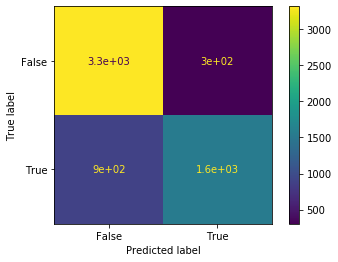

In [31]:
import matplotlib as plt
from sklearn.metrics import plot_confusion_matrix

#Fit model based on input compas_pipe
model = pipe.fit(X_train, y_train)

#Make prediction
y_pred = model.predict(X_test)


plot_confusion_matrix(model, X_test, y_test)

In [32]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support, roc_auc_score, accuracy_score


print('Precision                                   : %.3f'%precision_score(y_test, y_pred))
print('Recall                                      : %.3f'%recall_score(y_test, y_pred))
print('Accuracy                                    : %.3f'%accuracy_score(y_test, y_pred))
print('F1-Score                                    : %.3f'%f1_score(y_test, y_pred))
print('ROC AUC Score                               : %.3f'%roc_auc_score(y_test, y_pred))

#print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(y_test, y_pred))
print('\nClassification Report                       : ')
print(classification_report(y_test, y_pred))

Precision                                   : 0.837
Recall                                      : 0.633
Accuracy                                    : 0.802
F1-Score                                    : 0.721
ROC AUC Score                               : 0.775

Classification Report                       : 
              precision    recall  f1-score   support

       False       0.79      0.92      0.85      3621
        True       0.84      0.63      0.72      2459

    accuracy                           0.80      6080
   macro avg       0.81      0.77      0.78      6080
weighted avg       0.81      0.80      0.80      6080

